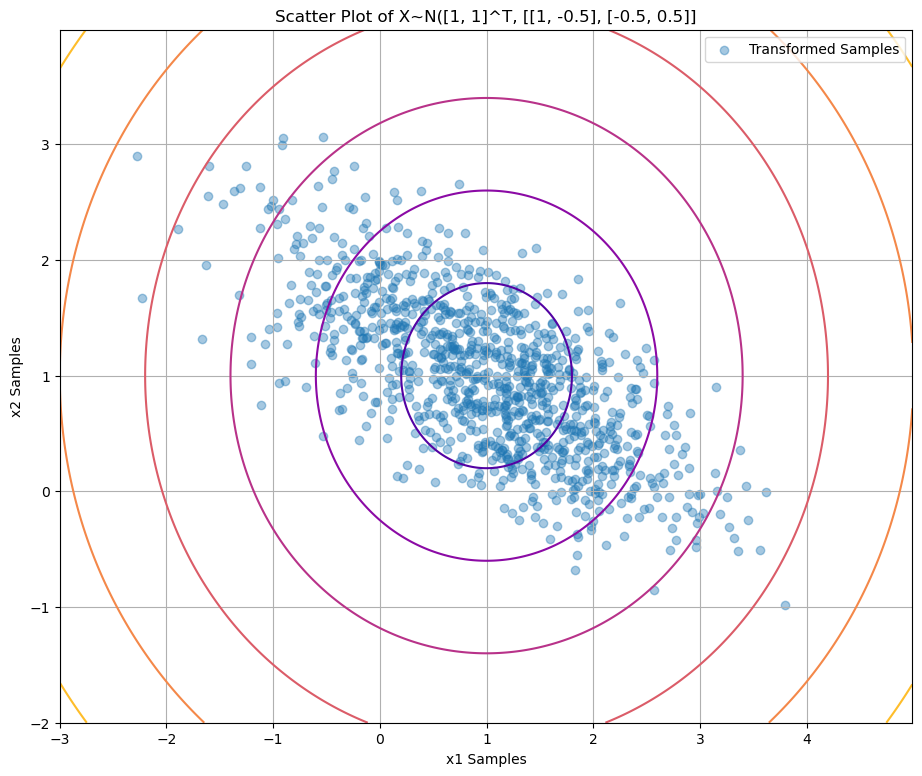

In [6]:
# THIS CODE IS MY OWN WORK, IT WAS WRITTEN WITHOUT CONSULTING CODE WRITTEN BY OTHER STUDENTS OR LARGE LANGUAGE MODELS LIKE CHATGPT. Catherine Baker
#I have completed this homework without collaborating with any classmates.

import numpy as np
import matplotlib.pyplot as plot
from scipy.stats import multivariate_normal

# Starting with Z ~ N(0, 1) -> returns random samples over the standard normal distribution with the parameters as dimensions
Z = np.random.randn(2, 1000) # 2 x's with 1000 samples each

# Setting up the linear transformation
mu = np.array([1, 1]) # Mean vector
Sigma = np.array([[1, -0.5], [-0.5, 0.5]]) # Covariance matrix

# Finding eigen values and vectors -> returns the eigen values and vectors of Sigma
eigvals, eigvecs = np.linalg.eigh(Sigma) # eigenvecs = V

# Transform Z to match the X~N(mu, Sigma) distribution
muTransformation = mu[:, np.newaxis] # making mu 2 x 1 for dimension compatibility
Lambda = np.diag(eigvals) # diagonalized matrix of eigenvalues
A = eigvecs @ np.sqrt(Lambda) # our "A" matrix = V * (Lambda)^{1/2}
X = muTransformation + A @ Z # the final represented transformation

# Plotting the new samples
plot.figure(figsize=(11, 9)) # set size
plot.scatter(X[0, :], X[1, :], alpha=0.4, label='Transformed Samples')

# Add level curves of the Euclidian Distance to the plot
x, y = np.mgrid[-3:5:.01, -2:4:.01] # sets boundaries for the level curves
D = np.sqrt((x - mu[0])**2 + (y - mu[1])**2) # Euclidian Distance of each (x, y) to mu
plot.contour(x, y, D, cmap='plasma') # plotting the contours against x and y

# Final plot settings
plot.title('Scatter Plot of X~N([1, 1]^T, [[1, -0.5], [-0.5, 0.5]]')
plot.xlabel('x1 Samples')
plot.ylabel('x2 Samples')
plot.grid(True)
plot.legend()
plot.show()